In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
raw_data = pd.read_csv('Dataset_regression.csv')
raw_data.columns= raw_data.columns.str.strip()
raw_data['GINIt-1'] = raw_data['GINIt-1'].replace(['..',], np.nan)
raw_data['GINIt-2'] =raw_data['GINIt-2'].replace(['..',], np.nan)
raw_data['Credit_GDP'] =raw_data['Credit_GDP'].replace(['..',], np.nan)
raw_data['Credit_GDP'] =raw_data['Credit_GDP'].replace(['..',], np.nan)
raw_data['GDP_growth'] =raw_data['GDP_growth'].replace(['..',], np.nan)
raw_data['Inflation'] =raw_data['Inflation'].replace(['..',], np.nan)
raw_data['FDI_GDP'] =raw_data['FDI_GDP'].replace(['..',], np.nan)
raw_data['GINI'] = raw_data['GINI'].replace(['..',], np.nan)
raw_data


,Country,Code,Time,GINI,GINIt-1,GINIt-2,Credit_GDP,FDI_GDP,GDP_growth,Inflation
0,France,FRA,2006,29.7,29.8,30.6,126.667771,3.395497,2.374947,2.161198
1,France,FRA,2007,32.4,29.7,29.8,137.2772361,3.145979,2.361499,2.563906
2,France,FRA,2008,33,32.4,29.7,142.9900043,2.325979,0.195295,2.379119
3,France,FRA,2009,NaN,33,32.4,140.3819049,0.682308,-2.941341,0.096624
4,France,FRA,2010,33.7,NaN,33,143.6183782,1.469676,1.965657,1.079825
5,France,FRA,2011,33.3,33.7,NaN,145.8143219,1.543719,2.079229,0.943612
6,France,FRA,2012,33,33.3,33.7,147.80637,1.228845,0.182693,1.157649
7,France,FRA,2013,32.5,33,33.3,143.9449882,1.124769,0.576242,0.776636
8,France,FRA,2014,32.3,32.5,33,146.9209246,0.203895,0.947586,0.576459
9,France,FRA,2015,29.5,32.3,32.5,147.6959024,1.804898,1.067462,1.092316


In [3]:
filtered_data = raw_data.dropna()
filtered_data

,Country,Code,Time,GINI,GINIt-1,GINIt-2,Credit_GDP,FDI_GDP,GDP_growth,Inflation
0,France,FRA,2006,29.7,29.8,30.6,126.667771,3.395497,2.374947,2.161198
1,France,FRA,2007,32.4,29.7,29.8,137.2772361,3.145979,2.361499,2.563906
2,France,FRA,2008,33,32.4,29.7,142.9900043,2.325979,0.195295,2.379119
6,France,FRA,2012,33,33.3,33.7,147.80637,1.228845,0.182693,1.157649
7,France,FRA,2013,32.5,33,33.3,143.9449882,1.124769,0.576242,0.776636
8,France,FRA,2014,32.3,32.5,33,146.9209246,0.203895,0.947586,0.576459
9,France,FRA,2015,29.5,32.3,32.5,147.6959024,1.804898,1.067462,1.092316
12,Germany,DEU,2008,31.1,31.9,31.8,122.2828234,0.824175,1.082315,0.838792
13,Germany,DEU,2009,31.2,31.1,31.9,128.4509893,1.657946,-5.618860,1.756994
14,Germany,DEU,2010,30.7,31.2,31.1,164.7975628,2.518329,4.079933,0.757704


In [4]:
x_y = np.array(filtered_data)
GINI, GINIt1,GINIt2,Credit_GDP,GDP_growth,Inflation, FDI_GDP =x_y[:,3], x_y[:,4], x_y[:,5],x_y[:,6], x_y[:,7],x_y[:,8], x_y[:,9]

In [5]:
GINI, GINIt1,GINIt2,Credit_GDP,GDP_growth,Inflation, FDI_GDP  = GINI.reshape(-1,1), GINIt1.reshape(-1, 1),  GINIt2.reshape(-1,1), Credit_GDP.reshape(-1, 1), GDP_growth.reshape(-1,1), Inflation.reshape(-1, 1), FDI_GDP.reshape(-1,1)

In [6]:
lin_regression = LinearRegression()
lin_regression.fit(GINIt1.astype(float).reshape(-1,1),GINI.astype(float).reshape(-1,1))
m = lin_regression.coef_[0]
b = lin_regression.intercept_
print('equation: GINI = {0}GINIt1 + {1}'.format(m,b))


equation: GINI = [ 0.95848278]GINIt1 + [ 1.23783122]


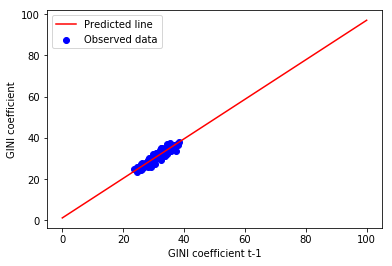

In [7]:
#predictions = lin_regression.predict(x1)
plt.scatter(GINIt1.astype(float), GINI.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('GINI coefficient t-1')
plt.ylabel('GINI coefficient')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [8]:
lin_regression = LinearRegression()
lin_regression.fit(GINIt2.astype(float).reshape(-1,1),GINI.astype(float).reshape(-1,1))
m = lin_regression.coef_[0]
b = lin_regression.intercept_
print('equation: GINI = {0}GINIt2 + {1}'.format(m,b))

equation: GINI = [ 0.93240828]GINIt2 + [ 2.09777553]


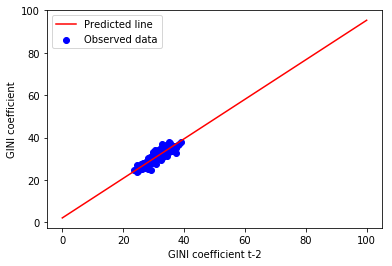

In [9]:
#predictions = lin_regression.predict(x1)
plt.scatter(GINIt2.astype(float), GINI.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('GINI coefficient t-2')
plt.ylabel('GINI coefficient')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [10]:
target = pd.DataFrame(filtered_data,columns=["GINI"])
predictors=pd.DataFrame(filtered_data,columns=['GINIt-1','GINIt-2','Credit_GDP','Credit_GDP','GDP_growth','Inflation','FDI_GDP'])


In [11]:
mult_regression = LinearRegression()
mult_regression.fit(predictors,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
mult_regression.coef_

array([[ 0.87623136,  0.07268376,  0.00103727,  0.00103727, -0.05512627,
         0.02610807,  0.00440374]])

In [13]:
mult_regression.intercept_

array([ 1.20938675])

In [65]:
rob=pd.read_csv("Robustness.csv")
rob.columns= rob.columns.str.strip()
rob['Low20'] =rob['Low20'].replace(['..',], np.nan)
rob['Low20t-1'] =rob['Low20t-1'].replace(['..',], np.nan)
rob['Low20t-2'] =rob['Low20t-2'].replace(['..',], np.nan)
rob['High20'] =rob['High20'].replace(['..',], np.nan)
rob['High20t-1'] =rob['High20t-1'].replace(['..',], np.nan)
rob['High20t-2'] =rob['High20t-2'].replace(['..',], np.nan)
rob['Credit_GDP'] =rob['Credit_GDP'].replace(['..',], np.nan)
rob['Credit_GDP'] =rob['Credit_GDP'].replace(['..',], np.nan)
rob['GDP_growth'] =rob['GDP_growth'].replace(['..',], np.nan)
rob['Inflation'] =rob['Inflation'].replace(['..',], np.nan)
rob['FDI_GDP'] =rob['FDI_GDP'].replace(['..',], np.nan)
filtered_rob= rob.dropna()
filtered_rob



,Country,Code,Time,Credit_GDP,GDP_growth,Low20,Low20t-1,Low20t-2,High20,High20t-1,High20t-2,Inflation,FDI_GDP
0,France,FRA,2006,126.667771,2.374947,8.4,8.6,8.4,38.3,38.5,39.2,2.161198,3.395497
1,France,FRA,2007,137.2772361,2.361499,8.1,8.4,8.6,40.9,38.3,38.5,2.563906,3.145979
2,France,FRA,2008,142.9900043,0.195295,7.9,8.1,8.4,41.2,40.9,38.3,2.379119,2.325979
6,France,FRA,2012,147.80637,0.182693,7.9,7.8,7.7,41.2,41.4,41.8,1.157649,1.228845
7,France,FRA,2013,143.9449882,0.576242,8,7.9,7.8,40.9,41.2,41.4,0.776636,1.124769
8,France,FRA,2014,146.9209246,0.947586,8,8,7.9,40.5,40.9,41.2,0.576459,0.203895
11,Germany,DEU,2008,122.2828234,1.082315,8.2,8.1,8.1,39.5,40.2,40,0.838792,0.824175
12,Germany,DEU,2009,128.4509893,-5.618860,8.3,8.2,8.1,39.8,39.5,40.2,1.756994,1.657946
13,Germany,DEU,2010,164.7975628,4.079933,8.3,8.3,8.2,39.2,39.8,39.5,0.757704,2.518329
14,Germany,DEU,2011,161.9667643,3.660000,8.4,8.3,8.3,38.6,39.2,39.8,1.070477,2.594161


In [51]:
x_yrob= np.array(filtered_rob)
Credit_GDProb,GDP_growthrob,Low20, Low20t1, Low20t2,High20,High20t1,High20t2,Inflationrob, FDI_GDProb =x_yrob[:,3].astype(float), x_yrob[:,4].astype(float), x_yrob[:,5].astype(float),x_yrob[:,6].astype(float), x_yrob[:,7].astype(float),x_yrob[:,8].astype(float), x_yrob[:,9].astype(float), x_yrob[:,10].astype(float),x_yrob[:,11].astype(float), x_yrob[:,12].astype(float)

In [52]:
Credit_GDProb,GDP_growthrob,Low20, Low20t1, Low20t2,High20,High20t1,High20t2,Inflationrob, FDI_GDProb  = Credit_GDProb.reshape(-1,1), GDP_growthrob.reshape(-1, 1),  Low20.reshape(-1,1), Low20t1.reshape(-1, 1), Low20t2.reshape(-1,1), High20.reshape(-1, 1), High20t1.reshape(-1,1), High20t2.reshape(-1,1),Inflationrob.reshape(-1,1),FDI_GDProb.reshape(-1,1)

In [55]:
lin_regressionrob = LinearRegression()
lin_regressionrob.fit(High20t1,High20)
m = lin_regressionrob.coef_[0]
b = lin_regressionrob.intercept_
print('equation: High20 = {0}High20t1 + {1}'.format(m,b))


equation: High20 = [ 0.95013336]High20t1 + [ 1.96157422]


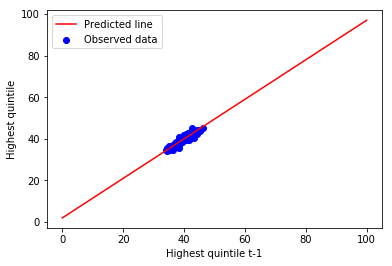

In [56]:
#predictions = lin_regression.predict(x1)
plt.scatter(High20t1.astype(float), High20.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('Highest quintile t-1')
plt.ylabel('Highest quintile')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [57]:
lin_regressionrob = LinearRegression()
lin_regressionrob.fit(High20t2.astype(float).reshape(-1,1),High20.astype(float).reshape(-1,1))
m = lin_regressionrob.coef_[0]
b = lin_regressionrob.intercept_
print('equation: High20 = {0}High20t2 + {1}'.format(m,b))


equation: High20 = [ 0.91161058]High20t2 + [ 3.50911453]


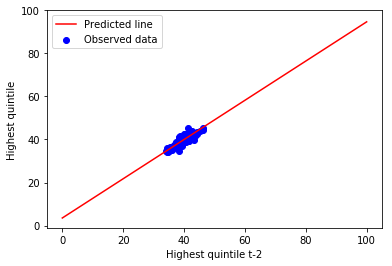

In [58]:
#predictions = lin_regression.predict(x1)
plt.scatter(High20t2.astype(float), High20.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('Highest quintile t-2')
plt.ylabel('Highest quintile')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [59]:
lin_regressionrob = LinearRegression()
lin_regressionrob.fit(Low20t1.astype(float).reshape(-1,1),Low20.astype(float).reshape(-1,1))
m = lin_regressionrob.coef_[0]
b = lin_regressionrob.intercept_
print('equation: Low20 = {0}Low20t1 + {1}'.format(m,b))


equation: Low20 = [ 0.97631019]Low20t1 + [ 0.14886165]


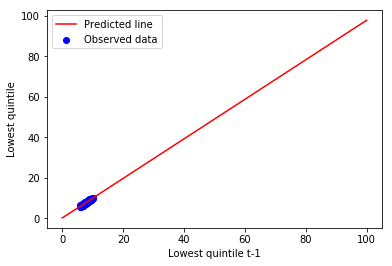

In [60]:
#predictions = lin_regression.predict(x1)
plt.scatter(Low20t1.astype(float), Low20.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('Lowest quintile t-1')
plt.ylabel('Lowest quintile')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [61]:
lin_regressionrob = LinearRegression()
lin_regressionrob.fit(Low20t2.astype(float).reshape(-1,1),Low20.astype(float).reshape(-1,1))
m = lin_regressionrob.coef_[0]
b = lin_regressionrob.intercept_
print('equation: Low20 = {0}Low20t2 + {1}'.format(m,b))


equation: Low20 = [ 0.964714]Low20t2 + [ 0.20316704]


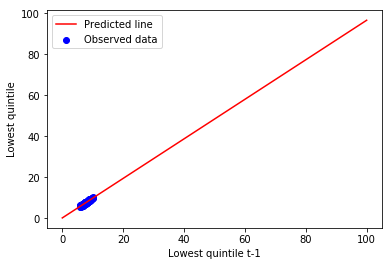

In [62]:
#predictions = lin_regression.predict(x1)
plt.scatter(Low20t1.astype(float), Low20.astype(float),  color='blue')
plt.plot([0,100],[b,m*100+b],'r')
plt.yticks([0,20,40,60,80,100])
plt.xticks([0,20,40,60,80,100])
plt.xlabel('Lowest quintile t-1')
plt.ylabel('Lowest quintile')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [63]:
targethigh = pd.DataFrame(filtered_rob,columns=["High20"])
predictorshigh=pd.DataFrame(filtered_rob,columns=['Credit_GDProb','GDP_growthrob','High20t-1','High20t-2','Inflationrob','FDI_GDProb'])
mult_regressionhigh = LinearRegression()
mult_regressionhigh.fit(predictorshigh,targethigh)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mult_regressionhigh.coef_

In [ ]:
mult_regressionhigh.intercept_

In [ ]:
targetlow = pd.DataFrame(filtered_rob,columns=["Low20"])
predictorslow=pd.DataFrame(filtered_rob,columns=['Low20t-1','Low20t-2','Credit_GDP','Credit_GDP','GDP_growth','Inflation','FDI_GDP'])
mult_regressionlow = LinearRegression()
mult_regressionlow.fit(predictorslow,targethigh)

In [ ]:
mult_regressionlow.coef_